<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%EC%95%84%EB%82%A0%EB%A1%9C%EA%B7%B8_%EC%8B%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아날로그 시계

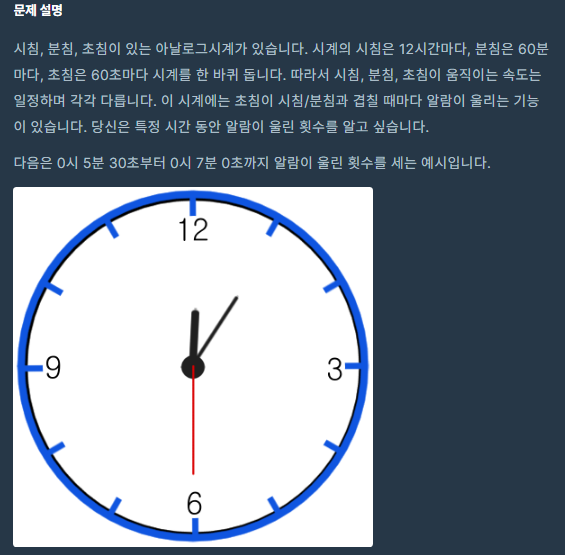

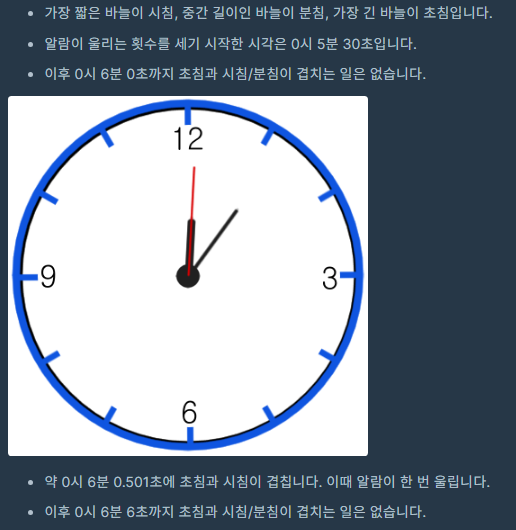

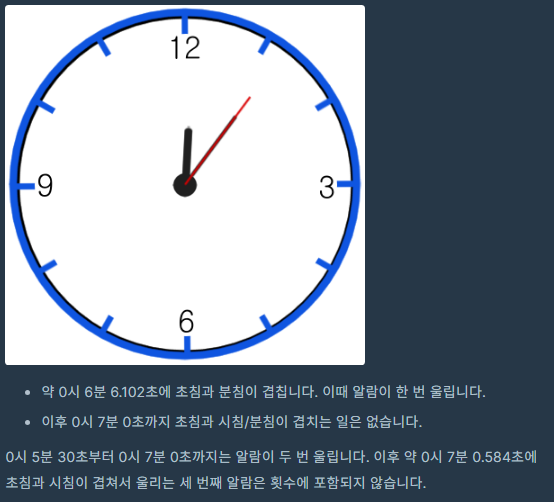

## 입력 출력 및 예제


* 입력

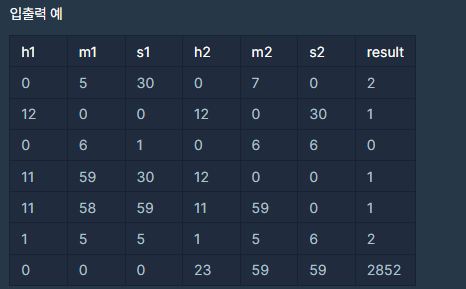

* 출력

* 예제

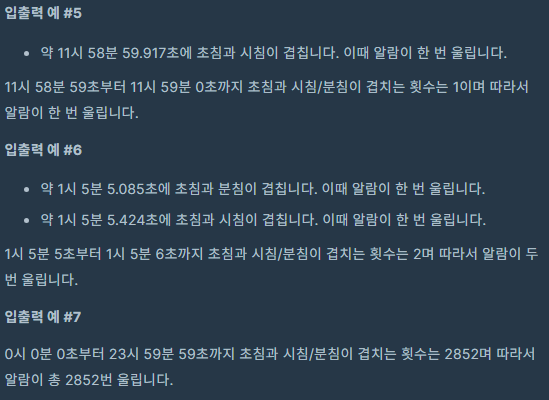

## 구상

- 수학적으로 접근가능할까 ?
- 0.00x 단위도 생각해줘야한다...

## 코드

In [70]:
# Fail
def time_to_sec(h,m,s):
    return 3600 * h + 60 * m + s

def sec_to_ang(s):
    h, m, s = s * (1/120), s * (1/10), s * 6
    return h % 360, m % 360, s % 360

def solution(h1, m1, s1, h2, m2, s2):
    start = time_to_sec(h1, m1, s1)
    end = time_to_sec(h2, m2, s2)

    answer = 0
    for t in range(start, end):
        h_cur, m_cur, s_cur = sec_to_ang(t)
        h_next, m_next, s_next = sec_to_ang(t + 1)

        hit_hour = s_cur < h_cur and s_next >= h_next
        hit_min = s_cur < m_cur and s_next >= m_next
        both = hit_hour and hit_min

        if both:
            answer += 1  # 동시에 겹치면 한 번만 증가
        elif hit_hour or hit_min:
            answer += 1

    return answer

In [ ]:
# GPT # 공식기반
def getCount(h, m, s):
    total = h * 3600 + m * 60 + s
    minute_hit = total * 59 // 3600
    hour_hit = total * 719 // 43200
    adjustment = 1 if h >= 12 else 0
    return minute_hit + hour_hit - adjustment

def solution(h1, m1, s1, h2, m2, s2):
    answer = getCount(h2, m2, s2) - getCount(h1, m1, s1)
    if (h1 in {0, 12}) and m1 == 0 and s1 == 0:
        answer += 1
    return answer


In [75]:
solution(h1, m1, s1, h2, m2, s2)

0

In [73]:
h1, m1, s1, h2, m2, s2 = 0, 5, 30, 0, 7, 0
# h1, m1, s1, h2, m2, s2 = 12, 0, 0, 12, 0, 30
# h1, m1, s1, h2, m2, s2 = 0, 0, 0, 23, 59, 59
# h1, m1, s1, h2, m2, s2 = 1, 5, 5, 1, 5, 6

In [23]:
a = time_to_sec(4,30,59)
h, m, s = sec_to_ang(a)
print('시침:{},분침: {}, 초침: {}'.format(h, m, s))

시침:135.49166666666667,분침: 185.9000000000001, 초침: 354


### 메모

* 각도를 이용
* 겹친다는 것을 시침, 분침, 초침의 포지션(순위)이 바뀐다는 것으로 잘못 해석함